#Student Name: Fergus Mc Hale
#Student ID: 18203485

Purpose
The purpose of this E-tivity is to introduce the basics of probability theory.

Task (Complete by Saturday Week 6)
Describe a simple problem that contains a chance element. 
Use a continuous random variable or a discrete random variable.
Use a normal distribution or a uniform distribution.

Write Python code to simulate an experiment with your problem. The simulation can include a simulated action (e.g. rolling dice) or a simulated observation (e.g. observing rain or sunshine). The code should run the experiment a sufficient number of times such that you can calculate/approximate the following:

The expected value of your random variable.
The standard deviation of your random variable.
Additionally you should be able to:

Plot the distribution found in your simulated experiment
 
 N.B.:

Use the Jupyter Notebook provided in the repository for week 6.
You do not need to encapsulate your code in functions or methods.
Structure your notebook as follows:
Markdown cell with problem description
Cell(s) with experiment
Cell(s) with outputs and graphs
You may only use the following modules:
Random
Numpy
Matplotlib
You are not required to perform exception handling.
You are not required to provide tests for your code.
HINTS:

You can use matplotlib to plot a histogram of a list of samples as follows:
num_bins = 21
plt.hist(samples, num_bins, facecolor='blue')
plt.show()

GIT push your implementation and post the description of your problem to E-tivity 6: Probability Theory.

Include calculated values of points 1 and 2 above.
Provide a link to your branch.
Respond (Complete by Wednesday Week 7)
Respond to one of your peers with:

A respectful and in-depth analysis of their approach.
Suggestions for improvements or alternative solutions for the code.
Reflect (Complete by Saturday Week 7)
Use the feedback provided to you, and any other insights you have gained since writing the original code to improve the code you wrote in this E-tivity. GIT push the result to your remote branch.

A Deck contains 52 cards a card is picked at random. 
What is the probability of getting a king in your first hand?
What is the probability of getting a diamond on your seventh hand?
What is the probability of getting an even number card in your fifth turn?

In [111]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

class Card:

    def __init__( self, rank, suit ):
        self.rank = rank
        self.suit = suit

    def __str__( self ):
        return self.rank + " of " + self.suit
    

class Deck:

    def __init__(self):
        self.ranks = [ "Ace", "2", "3", "4", "5", "6", "7","8", "9", "10", "Jack", "Queen", "King" ]
        self.suits = [ "Clubs", "Diamonds", "Hearts", "Spades" ]
        self.cards = [Card(rank,suit)  for rank in self.ranks for suit in self.suits]
        self.deck_size = len(self.cards)
        
    def pick_card(self):
        return rand.choice(self.cards)
    
current_cards = []
def simulation(n):   
    #initialize new deck
    current_deck = Deck()
    # go through similuation row at a tim
    for i in range(n):
        # set current count to zero
        current_count = 0
        # pick a card from the deck
        current_cards.append(current_deck.pick_card())
        # increase count
        current_count +=1
        # reset the deck
        if current_count == 1:
            current_count = 0
            current_deck = Deck()
                    
def get_mean(num):
    return np.mean(num)

def get_standard_deviation(num):
    return np.std(num)

In [112]:
simulation(1000)

KingofClubCount = 0
QueenofHeartsCount = 0
EvenNumberCount = 0
even_number = ["2","4","6","8","10"]
current_iteration_count = 0

for item in current_cards:
    current_iteration_count += 1
    print(item.rank + " " + item.suit)
    if item.rank == "King":
        KingofClubCount += 1
        
    if item.rank == "Queen":
        QueenofHeartsCount += 1
        
    if item.rank in even_number:
        EvenNumberCount += 1


print("King Count: {}".format(KingofClubCount))
print("King Mean: {}".format(get_mean(KingofClubCount)))
print("King Std dev: {}".format(get_standard_deviation(KingofClubCount)))

print("Queen Count: {}".format(QueenofHeartsCount))
print("Queen Mean: {}".format(get_mean(QueenofHeartsCount)))
print("Queen Std dev: {}".format(get_standard_deviation(QueenofHeartsCount)))

print("Even Number Count: {}" .format(EvenNumberCount))
print("Even Number Mean: {}" .format(get_mean(EvenNumberCount)))
print("Even Number Std dev: {}" .format(get_standard_deviation(EvenNumberCount)))

5 Spades
Jack Clubs
King Clubs
Ace Diamonds
6 Spades
7 Spades
3 Spades
Ace Diamonds
8 Hearts
6 Spades
7 Hearts
Ace Hearts
2 Hearts
King Spades
7 Clubs
7 Diamonds
3 Hearts
Queen Clubs
King Hearts
5 Hearts
Jack Hearts
6 Clubs
2 Diamonds
9 Clubs
4 Diamonds
Ace Hearts
Queen Hearts
Jack Spades
Queen Clubs
9 Diamonds
Jack Spades
8 Diamonds
7 Diamonds
7 Spades
Ace Clubs
8 Hearts
Queen Diamonds
5 Spades
King Clubs
9 Hearts
Jack Clubs
10 Hearts
8 Spades
Ace Diamonds
6 Hearts
7 Clubs
King Diamonds
6 Hearts
3 Hearts
Jack Diamonds
4 Diamonds
7 Spades
Ace Spades
6 Spades
8 Spades
King Hearts
Jack Hearts
2 Hearts
10 Hearts
5 Diamonds
Queen Diamonds
Ace Diamonds
9 Clubs
5 Diamonds
Ace Hearts
10 Diamonds
6 Clubs
King Hearts
3 Diamonds
King Clubs
7 Spades
7 Hearts
6 Diamonds
9 Spades
10 Spades
Jack Diamonds
Queen Clubs
6 Hearts
Ace Hearts
5 Clubs
8 Hearts
2 Spades
Queen Diamonds
6 Spades
9 Hearts
King Spades
Queen Clubs
2 Spades
3 Clubs
3 Hearts
5 Hearts
5 Diamonds
Ace Diamonds
4 Spades
8 Diamonds
Ace 

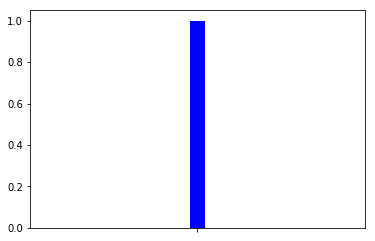

In [79]:






        




samples = ""
num_bins = 21
plt.hist(samples, num_bins, facecolor='blue')
plt.show()